In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

degrees start idx: tensor(62)
degrees start idx: tensor(125)
degrees start idx: tensor(249)


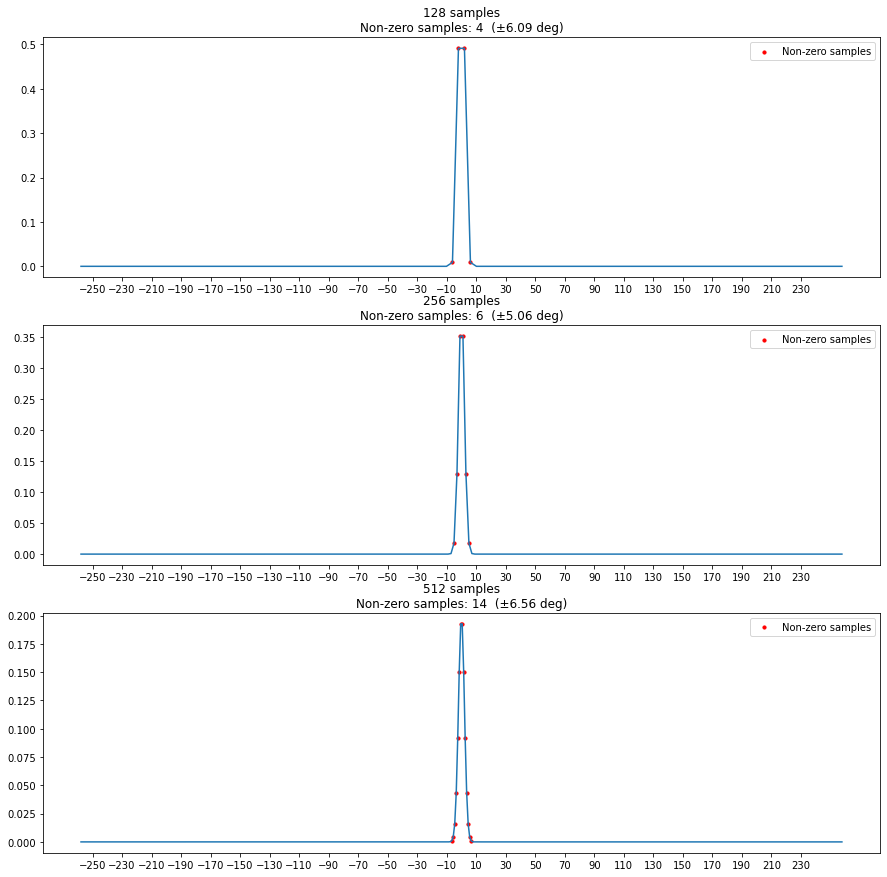

In [144]:
bound = 4.5
target = 0
probability_mass_covered = 0.999
n_samples_options = [128, 256, 512]
temperature = 0.0025


fig, axes = plt.subplots(3, 1, figsize=(15, 15))

for ax in axes:
    ax.set_xticks(np.arange(-250, 250, 20))


for i, n_samples in enumerate(n_samples_options):
    samples = torch.linspace(-bound, bound, n_samples)
    distances = torch.abs(samples - target)**2
    probs = torch.softmax(-distances/temperature, dim=0)
    degrees_start_idx = np.argmax(np.cumsum(probs) > 1-probability_mass_covered)
    print('degrees start idx:',degrees_start_idx)
    degrees_covered = abs(np.degrees(samples)[degrees_start_idx])
    degrees_end_idx = n_samples-degrees_start_idx
    samples_covered = int((n_samples/2 - degrees_start_idx) * 2)
    axes[i].set_title(f'{n_samples} samples\nNon-zero samples: {samples_covered}  (±{degrees_covered:.2f} deg)')
    axes[i].plot(np.degrees(samples), probs)
    axes[i].scatter(np.degrees(samples)[degrees_start_idx:degrees_end_idx], probs[degrees_start_idx:degrees_end_idx], s=10, color='red', label='Non-zero samples')
    axes[i].legend()

plt.show()

In [88]:
T = 0.05

target = torch.rand((512, 1)) * 2 * bound - bound # 512 x 1

# Generate N negatives, one for each element in the batch: (B, N, D).
negatives = torch.rand((batch_size, n_samples, 1)) * 2 * bound - bound # 512 x 1024 x 1

# Merge target and negatives: (B, N+1, D).
targets = torch.cat([target.unsqueeze(dim=1), negatives], dim=1) # 512 x 1025 x 1
print(f'merged targets (should be [B, N+1, D]): {targets.shape} {targets.dtype}')

# Generate a random permutation of the positives and negatives.
permutation = torch.rand(targets.size(0), targets.size(1)).argsort(dim=1)
print(f'permutation: {permutation.shape} {permutation.dtype}')
targets = targets[torch.arange(targets.size(0)).unsqueeze(-1), permutation]
print(f'permuted targets: {targets.shape} {targets.dtype}')

# Get the original index of the positive. This will serve as the class label
# for the loss.
gt_indices = (permutation == 0).nonzero()[:, 1]
gt_values = targets[range(targets.shape[0]), gt_indices]
distances_from_gt = torch.abs(targets - gt_values.unsqueeze(dim=1))**2
ground_truth = torch.softmax(-distances_from_gt/T, dim=1).squeeze() # gaussian around correct answer

print(f'gt probs: {ground_truth.shape} {ground_truth.dtype}')

# make ground truth indices into a one-hot vector
# ground_truth = torch.zeros_like(targets)
# ground_truth[torch.arange(ground_truth.size(0)).unsqueeze(-1), ground_truth_indices.unsqueeze(-1)] = 1

merged targets (should be [B, N+1, D]): torch.Size([512, 1025, 1]) torch.float32
permutation: torch.Size([512, 1025]) torch.int64
permuted targets: torch.Size([512, 1025, 1]) torch.float32
ground truth: torch.Size([512]) torch.int64
ground truth values: torch.Size([512, 1]) torch.float32
distances from gt: torch.Size([512, 1025, 1]) torch.float32
gt probs: torch.Size([512, 1025]) torch.float32


In [90]:
ground_truth_values[0]

tensor([-3.1949])

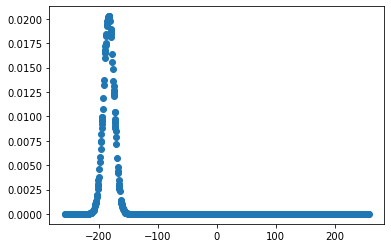

In [89]:
plt.scatter(np.degrees(targets[0]), gt_probs[0])

inputs: torch.Size([512, 3, 68, 264]) torch.float32
target: torch.Size([512, 1]) torch.float32
merged targets (should be [B, N+1, D]): torch.Size([512, 513, 1]) torch.float32
permutation: torch.Size([512, 513]) torch.int64
permuted targets: torch.Size([512, 513, 1]) torch.float32